## Imports


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np


## Import all .csv data

In [2]:
autos = pd.read_csv('../Quelldateien/autos_scraped.csv') #csv with scraped EVs from Autolina
autos

,web-scraper-order,web-scraper-start-url,Preis,plz,jahr,ps-stand,Farbe
0,1669622809-189,https://www.autolina.ch/elektro-auto,49'650,8640,NaN,231.0,silber
1,1669622809-190,https://www.autolina.ch/elektro-auto,42'500,6464,2022.0,204.0,weiss
2,1669622809-191,https://www.autolina.ch/elektro-auto,70'200,8807,NaN,325.0,weiss
3,1669622809-192,https://www.autolina.ch/elektro-auto,44'900,1184,2019.0,513.0,weiss
4,1669622809-193,https://www.autolina.ch/elektro-auto,68'990,1920,NaN,408.0,sonstiges
...,...,...,...,...,...,...,...
2309,1669622809-2498,https://www.autolina.ch/elektro-auto,112'790,4310,2022.0,503.0,schwarz
2310,1669622809-2499,https://www.autolina.ch/elektro-auto,45'700,9630,NaN,204.0,blau
2311,1669622809-2500,https://www.autolina.ch/elektro-auto,49'800,3322,2022.0,218.0,blau
2312,1669622809-2501,https://www.autolina.ch/elektro-auto,41'875,8820,NaN,122.0,weiss


In [3]:
ladestellen = pd.read_csv('../Ausgabedateien/locations_Ladestationen.csv') #csv from Ausgabedateien (orig: opendata.swiss)
ladestellen

,Unnamed: 0,Latitude,Longitude,City,Country,PostalCode,Street,OperatorName
0,0,46.813520,9.845910,Davos,CHE,7260,Bahnhofstrasse,Fastned
1,1,46.813500,9.845860,Davos,CHE,7260,Bahnhofstrasse,Fastned
2,2,46.800080,9.831210,Davos,CHE,7270,Talstrasse,Fastned
3,3,46.800130,9.831240,Davos,CHE,7270,Talstrasse,Fastned
4,4,46.799780,9.831040,Davos,CHE,7270,Talstrasse,Fastned
...,...,...,...,...,...,...,...,...
5014,7105,47.380548,8.109115,Suhr,CHE,5034,Rastplatz Suhr A1,eCarUp
5015,7106,47.392556,8.160158,Lenzburg,CHE,5600,Rastplatz Lenzburg A1,eCarUp
5016,7107,47.392556,8.160158,Lenzburg,CHE,5600,Rastplatz Lenzburg A1,eCarUp
5017,7108,47.392556,8.160158,Lenzburg,CHE,5600,Rastplatz Lenzburg A1,eCarUp


In [4]:
dfsolarpotenziale = pd.read_csv('../Quelldateien/solarpotential.csv') # csv from Quelldateien
dfsolarpotenziale

,Unnamed: 0,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarHeat_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,PLZ4,%_IN_GDE,KTKZ,GDENR
0,0,1,Aeugst am Albis,Zürich,CH,13.43,8.70,4.72,18.06,13.33,4.72,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8914.0,100.00,ZH,1.0
1,1,2,Affoltern am Albis,Zürich,CH,50.06,33.83,18.63,69.25,53.02,18.63,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8909.0,14.34,ZH,2.0
2,3,3,Bonstetten,Zürich,CH,19.66,11.48,8.79,26.72,18.54,8.79,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8906.0,100.00,ZH,3.0
3,4,4,Hausen am Albis,Zürich,CH,23.67,15.70,8.38,32.61,24.64,8.38,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6340.0,0.77,ZH,4.0
4,7,5,Hedingen,Zürich,CH,19.14,11.97,7.19,25.68,18.51,7.19,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8908.0,100.00,ZH,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,4768,6806,Vendlincourt,Jura,CH,8.83,6.04,2.35,11.61,8.82,2.35,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2943.0,100.00,JU,6806.0
2141,4769,6807,Basse-Allaine,Jura,CH,18.64,13.63,4.16,24.70,19.69,4.16,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2915.0,0.70,JU,6807.0
2142,4773,6808,Clos du Doubs,Jura,CH,21.19,15.39,5.47,27.37,21.57,5.47,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2882.0,46.03,JU,6808.0
2143,4780,6809,Haute-Ajoie,Jura,CH,26.39,20.84,5.01,33.19,27.64,5.01,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2906.0,49.43,JU,6809.0


## Format dataframes for better display
Read out how many charging points are available per municipality.

In [5]:
dfladestellen = ladestellen.PostalCode.value_counts().reset_index()
dfladestellen.columns = ["plz", "Ladestellen"]
dfladestellen


,plz,Ladestellen
0,6340,97
1,-,65
2,6300,53
3,9015,51
4,6010,49
...,...,...
850,5304,1
851,3177,1
852,7206,1
853,5405,1


In [6]:
#For the later merge, all values must be of type int.
dfladestellen = dfladestellen[dfladestellen['plz'].astype(str).str.isdigit()]
dfladestellen

,plz,Ladestellen
0,6340,97
2,6300,53
3,9015,51
4,6010,49
5,4900,42
...,...,...
850,5304,1
851,3177,1
852,7206,1
853,5405,1


Read out how many electric cars are advertised for sale per municipality

In [7]:
dfauto = autos.plz.value_counts().reset_index()
dfauto.columns = ["plz", "ElektroAutos"]
dfauto

,plz,ElektroAutos
0,9542,99
1,6010,50
2,6340,49
3,9642,43
4,5610,37
...,...,...
415,4450,1
416,8808,1
417,3225,1
418,8887,1


## Depict the distribution of electric cars and charging points
The graph shows that the distribution is left-skewed. It can be seen that the vast majority of municipalities have very few or no charging points/EVs. In addition, an outlier (at 100) can be observed

C:\Users\jkunz\AppData\Local\Temp\ipykernel_36512\2828034013.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


Text(0, 0.5, 'City \n')

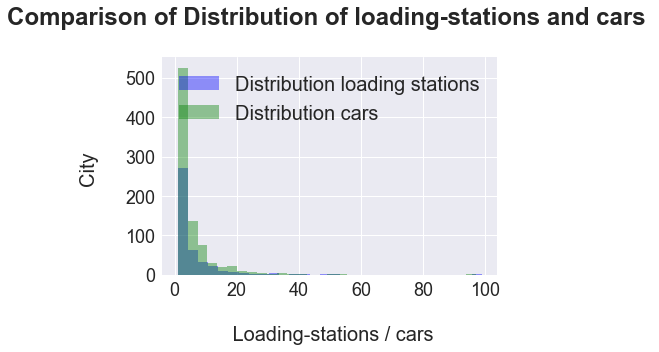

In [8]:
style.use('seaborn')
kwargs = dict(alpha=0.4, bins=30)
plt.hist(dfauto.ElektroAutos, **kwargs, color = 'b', label= 'Distribution loading stations')
plt.hist(dfladestellen.Ladestellen, **kwargs, color = 'g', label = 'Distribution cars')
plt.legend(fontsize = 20)

plt.title('Comparison of Distribution of loading-stations and cars \n', fontweight ="bold", fontsize = 24, fontname = "Arial")
plt.tick_params(labelsize=18)
plt.xlabel("\n Loading-stations / cars", fontsize = 20, fontname = "Arial")
plt.ylabel("City \n", fontsize = 20, fontname = "Arial")


Graph 1.0

##  Categorising and showing loading-stations per City

In [9]:
labels = ['0 - 5','5 - 10', '10 - 20', '20 - 40', '40 - 60', '60 - 100']

dfladestellen["Ladestellen_cat"] = pd.cut(dfladestellen.Ladestellen, bins=[0,5, 10, 20, 40, 60, 100], labels=labels)

dfladestellen

C:\Users\jkunz\AppData\Local\Temp\ipykernel_36512\2135381428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfladestellen["Ladestellen_cat"] = pd.cut(dfladestellen.Ladestellen, bins=[0,5, 10, 20, 40, 60, 100], labels=labels)


,plz,Ladestellen,Ladestellen_cat
0,6340,97,60 - 100
2,6300,53,40 - 60
3,9015,51,40 - 60
4,6010,49,40 - 60
5,4900,42,40 - 60
...,...,...,...
850,5304,1,0 - 5
851,3177,1,0 - 5
852,7206,1,0 - 5
853,5405,1,0 - 5


In [10]:
#The individual categories are summarized to get a better overview.
dfladestellencount = dfladestellen.Ladestellen_cat.value_counts().reset_index()
dfladestellencount.rename(columns = {'index':'labels'}, inplace = True)
dfladestellencount.labels.sort_values()
dfladestellencount


,labels,Ladestellen_cat
0,0 - 5,580
1,5 - 10,158
2,10 - 20,74
3,20 - 40,31
4,40 - 60,5
5,60 - 100,1


The graph below draws a similar picture as the distribution (Graph 1.0). Most communities have very few to no charging points.

C:\Users\jkunz\AppData\Local\Temp\ipykernel_36512\2242651455.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


Text(0, 0.5, 'City \n')

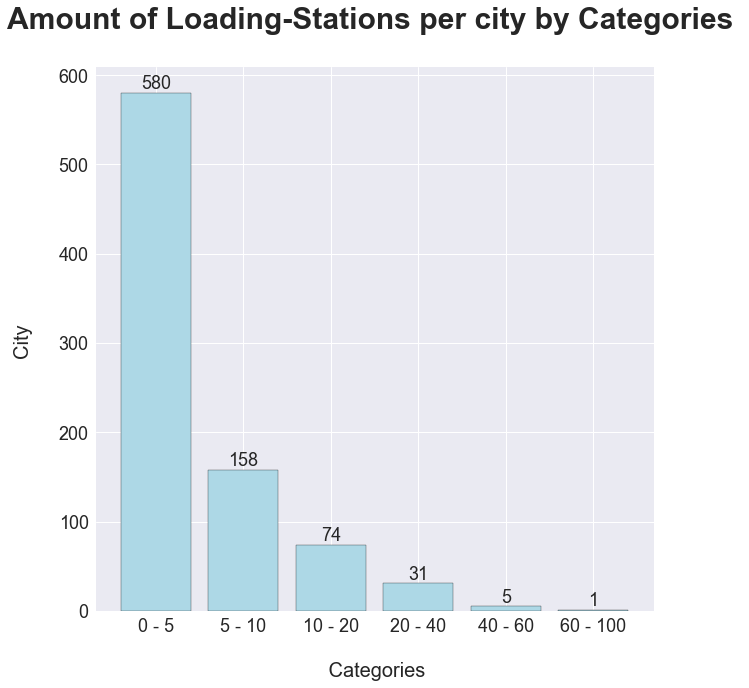

In [11]:
style.use('seaborn')
plt.figure(figsize=(10,10))
barplot = plt.bar(dfladestellencount.labels, dfladestellencount.Ladestellen_cat, fc="lightblue", ec = "black")
plt.title('Amount of Loading-Stations per city by Categories \n', fontweight ="bold", fontsize = 30, fontname = "Arial")
plt.bar_label(barplot, labels=dfladestellencount.Ladestellen_cat, label_type='edge', fontsize = 18)
plt.tick_params(labelsize=18)
plt.xlabel("\n Categories", fontsize = 20)
plt.ylabel("City \n", fontsize = 20)


Graph 2.0

## Merging the data frames (charging points / electric cars)

In [12]:
#The data frames electric cars and charging points are merged with the key "plz".
dfladestellen['plz']=dfladestellen['plz'].astype(int)
dfauto['plz']=dfauto['plz'].astype(dtype = int, errors = 'ignore')
dfmerge = dfauto.merge(dfladestellen, on = 'plz', how = 'outer')
dfmerge = dfmerge.replace(np.NaN, 0)
#dfmerge = dfmerge.fillna(value=0, method=None)
print(dfmerge)

      plz  ElektroAutos  Ladestellen Ladestellen_cat
0    9542          99.0          3.0           0 - 5
1    6010          50.0         49.0         40 - 60
2    6340          49.0         97.0        60 - 100
3    9642          43.0          6.0          5 - 10
4    5610          37.0          7.0          5 - 10
..    ...           ...          ...             ...
991  2746           0.0          1.0           0 - 5
992  5304           0.0          1.0           0 - 5
993  3177           0.0          1.0           0 - 5
994  7206           0.0          1.0           0 - 5
995  6078           0.0          1.0           0 - 5

[996 rows x 4 columns]


C:\Users\jkunz\AppData\Local\Temp\ipykernel_36512\93220649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfladestellen['plz']=dfladestellen['plz'].astype(int)


The data record is enriched with the column AutosProCharging Station. This should show how many electric cars are advertised per charging station in a municipality. These new values help to present the data more effectively.

In [13]:
for row in dfmerge.iterrows():
    dfmerge['AutosProStation'] = (dfmerge['ElektroAutos'])/(dfmerge['Ladestellen'])
#AutosProStation = Number of electric cars per charging station

print(dfmerge)


      plz  ElektroAutos  Ladestellen Ladestellen_cat  AutosProStation
0    9542          99.0          3.0           0 - 5        33.000000
1    6010          50.0         49.0         40 - 60         1.020408
2    6340          49.0         97.0        60 - 100         0.505155
3    9642          43.0          6.0          5 - 10         7.166667
4    5610          37.0          7.0          5 - 10         5.285714
..    ...           ...          ...             ...              ...
991  2746           0.0          1.0           0 - 5         0.000000
992  5304           0.0          1.0           0 - 5         0.000000
993  3177           0.0          1.0           0 - 5         0.000000
994  7206           0.0          1.0           0 - 5         0.000000
995  6078           0.0          1.0           0 - 5         0.000000

[996 rows x 5 columns]


In [14]:
labels = ['0','0 - 1', '1 - 2', '2 - 10', '>= 10']
dfmerge["AutosProStation_cattion_cat"] = pd.cut(dfmerge.AutosProStation, bins=[-0.00001, 0, 1, 2, 10, 40], labels=labels)

dfmerge

,plz,ElektroAutos,Ladestellen,Ladestellen_cat,AutosProStation,AutosProStation_cattion_cat
0,9542,99.0,3.0,0 - 5,33.000000,>= 10
1,6010,50.0,49.0,40 - 60,1.020408,1 - 2
2,6340,49.0,97.0,60 - 100,0.505155,0 - 1
3,9642,43.0,6.0,5 - 10,7.166667,2 - 10
4,5610,37.0,7.0,5 - 10,5.285714,2 - 10
...,...,...,...,...,...,...
991,2746,0.0,1.0,0 - 5,0.000000,0
992,5304,0.0,1.0,0 - 5,0.000000,0
993,3177,0.0,1.0,0 - 5,0.000000,0
994,7206,0.0,1.0,0 - 5,0.000000,0


## Presentation and analysis of the electric car per charging station ratio

The first boxplot shows the distribution of the AutoProStation values with outliers. It can be seen that there are some very serious outliers.

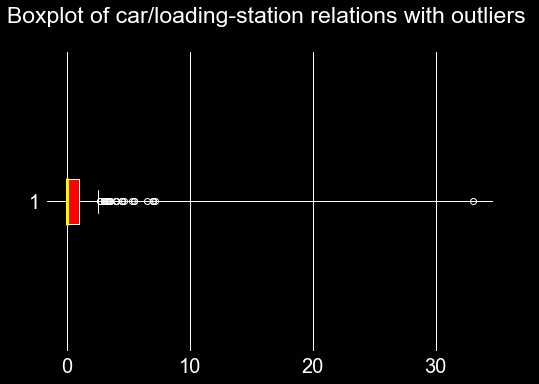

In [15]:
style.use('dark_background')
plt.title('Boxplot of car/loading-station relations with outliers \n', fontsize = 23)
bp = plt.boxplot(dfmerge.AutosProStation, vert=False, patch_artist=True, boxprops=dict(facecolor="red"))
for median in bp['medians']:
    median.set_color('yellow', )
    median.set_linewidth(3)
plt.tick_params(labelsize=20)

The second boxplot excludes the outliers. It can be observed that the mean is at 0. From this observation, we realize that in a community that has charging stations, there are typically no electric cars for sale.

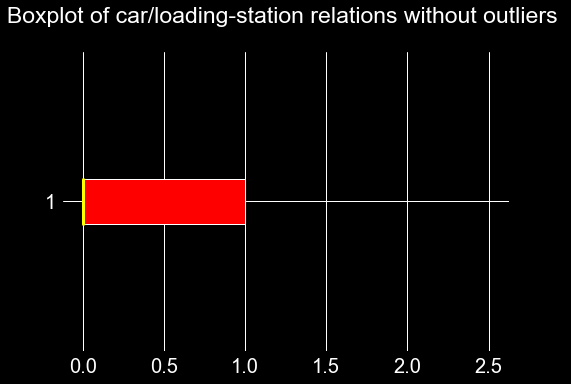

In [16]:
style.use('dark_background')
plt.title('Boxplot of car/loading-station relations without outliers \n', fontsize = 23)
bp = plt.boxplot(dfmerge.AutosProStation, vert=False, showfliers=False, patch_artist=True, boxprops=dict(facecolor="red"))
for median in bp['medians']:
    median.set_color('yellow', )
    median.set_linewidth(3)
plt.tick_params(labelsize=20)

## Break down AutosProStation

The AutosProStation column is now broken down. Municipalities that have the same car/charging station ratio are grouped together. The values (by AutosProStation) are then categorized

In [17]:
dfcounts = dfmerge.AutosProStation.value_counts().reset_index()
dfcounts

,index,AutosProStation
0,0.000000,576
1,inf,147
2,1.000000,32
3,0.500000,24
4,0.333333,10
...,...,...
108,3.333333,1
109,0.407407,1
110,1.714286,1
111,3.250000,1


In [18]:
#The categories are now summarized so that the data can be better displayed in a bar chart
dfcounts = dfmerge.AutosProStation_cattion_cat.value_counts().reset_index()
dfcounts.rename(columns = {'index':'labels'}, inplace = True)
dfcounts

,labels,AutosProStation_cattion_cat
0,0,576
1,0 - 1,196
2,1 - 2,39
3,2 - 10,37
4,>= 10,1


This graph confirms the findings from the boxplot. 734 municipalities have a charging station without an electric car being advertised for sale in this municipality. Only 27.5% of all municipalities with charging stations also offer electric cars.

Text(0, 0.5, 'Categories \n')

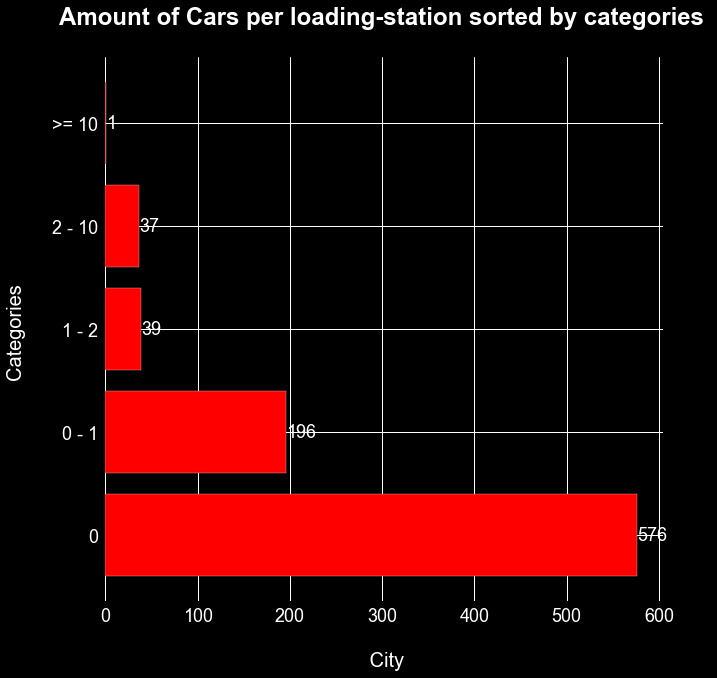

In [19]:
style.use('dark_background')
plt.figure(figsize=(10,10))
barplot = plt.barh(dfcounts.labels, dfcounts.AutosProStation_cattion_cat, fc="red", ec = "white")
plt.bar_label(barplot, labels=dfcounts.AutosProStation_cattion_cat, label_type='edge', fontsize = 18)



plt.title('Amount of Cars per loading-station sorted by categories \n', fontweight ="bold", fontsize = 24, fontname = "Arial")
plt.tick_params(labelsize=18)
plt.xlabel("\n City", fontsize = 20, fontname = "Arial")
plt.ylabel("Categories \n", fontsize = 20, fontname = "Arial")

## Display the Solar Potential (Scenario 1)

In [20]:
dfsolarpotenziale

,Unnamed: 0,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarHeat_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,PLZ4,%_IN_GDE,KTKZ,GDENR
0,0,1,Aeugst am Albis,Zürich,CH,13.43,8.70,4.72,18.06,13.33,4.72,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8914.0,100.00,ZH,1.0
1,1,2,Affoltern am Albis,Zürich,CH,50.06,33.83,18.63,69.25,53.02,18.63,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8909.0,14.34,ZH,2.0
2,3,3,Bonstetten,Zürich,CH,19.66,11.48,8.79,26.72,18.54,8.79,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8906.0,100.00,ZH,3.0
3,4,4,Hausen am Albis,Zürich,CH,23.67,15.70,8.38,32.61,24.64,8.38,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6340.0,0.77,ZH,4.0
4,7,5,Hedingen,Zürich,CH,19.14,11.97,7.19,25.68,18.51,7.19,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8908.0,100.00,ZH,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,4768,6806,Vendlincourt,Jura,CH,8.83,6.04,2.35,11.61,8.82,2.35,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2943.0,100.00,JU,6806.0
2141,4769,6807,Basse-Allaine,Jura,CH,18.64,13.63,4.16,24.70,19.69,4.16,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2915.0,0.70,JU,6807.0
2142,4773,6808,Clos du Doubs,Jura,CH,21.19,15.39,5.47,27.37,21.57,5.47,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2882.0,46.03,JU,6808.0
2143,4780,6809,Haute-Ajoie,Jura,CH,26.39,20.84,5.01,33.19,27.64,5.01,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2906.0,49.43,JU,6809.0


The first boxplot visualizes the GWH potentials of the 1st scenario. Here, too, it can be seen that there are some strong outliers.

Text(0.5, 0, '\n GWH')

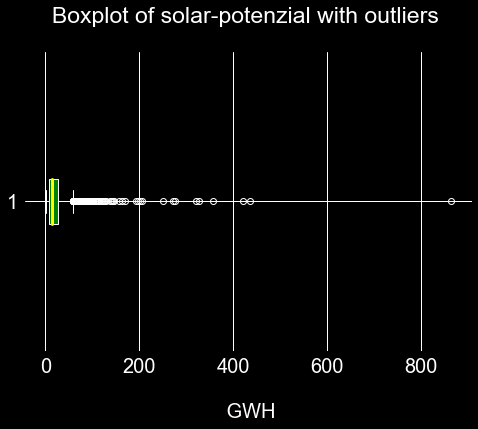

In [21]:
style.use('dark_background')
bp1 = plt.boxplot(dfsolarpotenziale.Scenario1_RoofsOnly_PotentialSolarElectricity_GWh, vert=False, patch_artist=True, boxprops=dict(facecolor="green") )

for median in bp1['medians']:
    median.set_color('yellow', )
    median.set_linewidth(3)
plt.tick_params(labelsize=20)

plt.title('Boxplot of solar-potenzial with outliers \n', fontsize = 23)
plt.xlabel("\n GWH", fontsize = 20, fontname = "Arial")

The second boxplot (outliers are excluded) shows that the median is around 15.

Text(0.5, 0, '\n GWH')

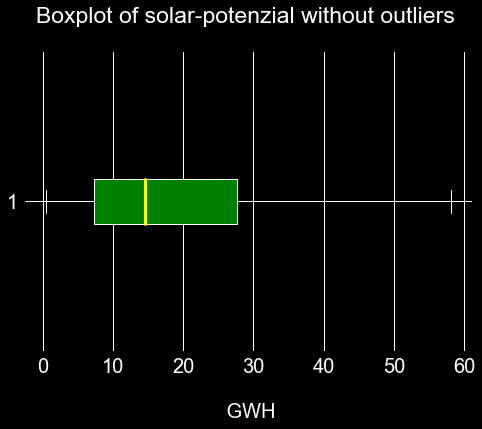

In [22]:
style.use('dark_background')
bp2 = plt.boxplot(dfsolarpotenziale.Scenario1_RoofsOnly_PotentialSolarElectricity_GWh, vert=False, showfliers=False, patch_artist=True, boxprops=dict(facecolor="green"))

for median in bp2['medians']:
    median.set_color('yellow', )
    median.set_linewidth(3)
plt.tick_params(labelsize=20)

plt.title('Boxplot of solar-potenzial without outliers \n', fontsize = 23)
plt.xlabel("\n GWH", fontsize = 20, fontname = "Arial")

In order to be able to read the exact numbers, we can examine the data frame with the describe function (Scenario1_RoofsOnly_PotentialSolarElectricity_GWh = relevant column). As observed in the boxplot, the median is around 15 (exactly 14.51). In addition, the mean value can be read out. At 23,304, this is well above the median. However, this metric needs to be viewed with caution as it is not robust and there are strong outliers in this example (This can be observed in the first boxplot)

In [23]:
dfsolarpotenziale['Scenario1_RoofsOnly_PotentialSolarElectricity_GWh'].describe()

count    2145.000000
mean       23.304284
std        35.084104
min         0.400000
25%         7.340000
50%        14.510000
75%        27.710000
max       865.540000
Name: Scenario1_RoofsOnly_PotentialSolarElectricity_GWh, dtype: float64

## Merging the data frames (solar potentials / charging points)

In [24]:
#prepare dfsolarpotenziale for the merge:
dfsolarpotenziale.rename(columns = {'PLZ4':'plz'}, inplace = True)
dfsolarpotenzilae = dfsolarpotenziale['plz'].drop_duplicates(keep='first', inplace=False)

In [25]:
#Merging of the dataframes dfladestellen and dfsolarpotenziale on the key "plz"
dfladestellen['plz']=dfladestellen['plz'].astype(int)
dfsolarpotenziale['plz']=dfsolarpotenziale['plz'].astype(dtype = int, errors = 'ignore')
dfmergesolar = dfsolarpotenziale.merge(dfladestellen, on = 'plz', how = 'outer')
dfmergesolar = dfmergesolar.replace(np.NaN, 0)

#Sort dataframe after solar-potential (Scenario1_RoofsOnly_PotentialSolarElectricity_GWh)
dfmergesolar = dfmergesolar.sort_values(by = ["Scenario1_RoofsOnly_PotentialSolarElectricity_GWh"], axis = 0, ascending=True)
dfmergesolar.reset_index(inplace = True, drop = True)

C:\Users\jkunz\AppData\Local\Temp\ipykernel_36512\1870843163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfladestellen['plz']=dfladestellen['plz'].astype(int)


In [26]:
dfmergesolar

,Unnamed: 0,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarHeat_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,plz,%_IN_GDE,KTKZ,GDENR,Ladestellen,Ladestellen_cat
0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,7206.0,0.00,0,0.0,1.0,0 - 5
1,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,7742.0,0.00,0,0.0,4.0,0 - 5
2,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,8898.0,0.00,0,0.0,4.0,0 - 5
3,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1285.0,0.00,0,0.0,4.0,0 - 5
4,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,8400.0,0.00,0,0.0,19.0,10 - 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,3922.0,5586.0,Lausanne,Vaud,CH,326.86,234.42,125.12,461.19,368.75,125.12,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,1000.0,7.03,VD,5586.0,0.0,NaN
2497,251.0,230.0,Winterthur,Zürich,CH,356.40,227.59,148.21,485.22,356.41,148.21,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8310.0,0.11,ZH,230.0,15.0,10 - 20
2498,2066.0,2701.0,Basel,Basel-Stadt,CH,421.63,286.02,170.56,562.46,426.85,170.56,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,4001.0,0.82,BS,2701.0,0.0,NaN
2499,413.0,351.0,Bern,Bern,CH,436.35,333.61,131.30,592.33,489.59,131.30,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,3004.0,3.14,BE,351.0,2.0,0 - 5


In order to be able to make a suitable comparison, we also need to know how much GWH a charging station consumes on average per year. It is assumed that an average charging station consumes 16.66 KWH per hour. This means that the average consumption of charging stations per year would be around 146,000 KWH. This corresponds to 0.146 GWH

(Quelle = https://www.energieheld.ch/elektromobilitaet/stromtankstellen)


In [27]:
#A column is added that shows the consumption in GWH per year for each city 
for row in dfmergesolar.iterrows():
    dfmergesolar['Ladestellen_GWH'] = (dfmergesolar['Ladestellen'])*0.146
dfmergesolar.Ladestellen_GWH

0       0.146
1       0.584
2       0.584
3       0.584
4       2.774
        ...  
2496    0.000
2497    2.190
2498    0.000
2499    0.292
2500    0.584
Name: Ladestellen_GWH, Length: 2501, dtype: float64

This graph shows that the solar power potential is higher than the power consumption for the respective charging stations in at least half of the municipalities. Due to the drastic emigration, no clear conclusions can be drawn yet.

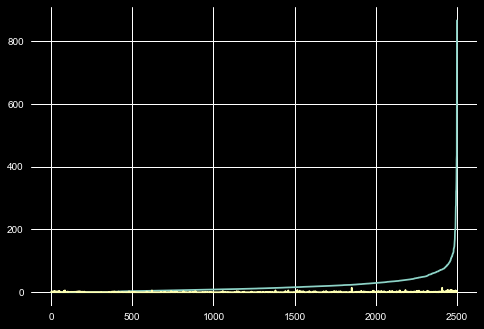

In [28]:
plt.plot(dfmergesolar.Scenario1_RoofsOnly_PotentialSolarElectricity_GWh, )
plt.plot(dfmergesolar.Ladestellen_GWH)



In [29]:
#to create a more accurate graph, the threshold value at which a value is considered an outlier must be read out.
#the .quantile function is used for this. So we can read where the 100% quantile is, anything above that is an outlier.
dfmergesolar["Scenario1_RoofsOnly_PotentialSolarElectricity_GWh"].quantile(0.01)
size = dfmergesolar["Scenario1_RoofsOnly_PotentialSolarElectricity_GWh"].quantile(0.99)
print(size)

123.51


In [30]:
#The dataframe must now be filtered in such a way that there are no more outliers
dfmergesolar_filterd = dfmergesolar[dfmergesolar['Scenario1_RoofsOnly_PotentialSolarElectricity_GWh'] < size]

The graph below shows which charging stations could cover your needs with the solar power potential. The yellow line represents the solar power potential. The blue line illustrates the annual consumption of all charging stations per municipality. It can be seen that around 2000 municipalities can cover the annual consumption of electric charging points with their solar power potential.

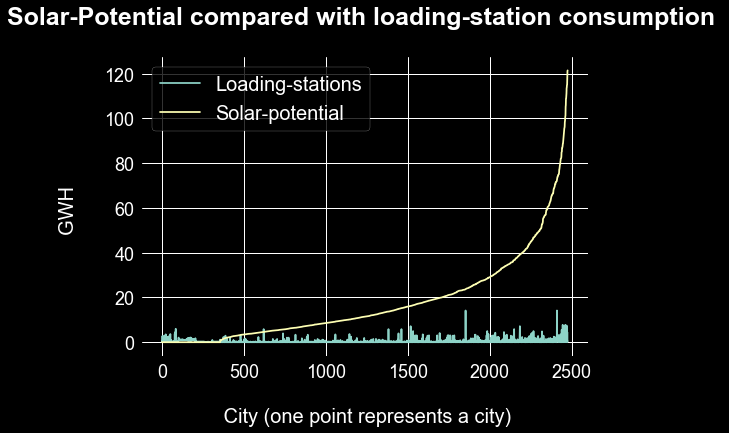

In [31]:
plt.plot(dfmergesolar_filterd.Ladestellen_GWH, label = "Loading-stations")
plt.plot(dfmergesolar_filterd.Scenario1_RoofsOnly_PotentialSolarElectricity_GWh, label = "Solar-potential" )


plt.title('Solar-Potential compared with loading-station consumption \n', fontweight ="bold", fontsize = 25, fontname = "Arial")
plt.tick_params(labelsize=18)
plt.xlabel("\n City (one point represents a city)", fontsize = 20)
plt.ylabel("GWH \n", fontsize = 20)
plt.legend(fontsize = 20, frameon = True)
